In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_ssim = pd.read_csv('experiment_data/cppresult-ssim.csv')
df_compressed = pd.read_csv('experiment_data/cppresult-time-memory.csv')
df_dkAM4 = pd.read_csv('experiment_data/duckresult.csv')

In [3]:
func_list = ['boxcox0', 'func1', 'plus', 'minus', 'multi', 'devide', 'L22', 'mean', 'variance', 'weightsum', 'max', 'L2', 'L2LN']

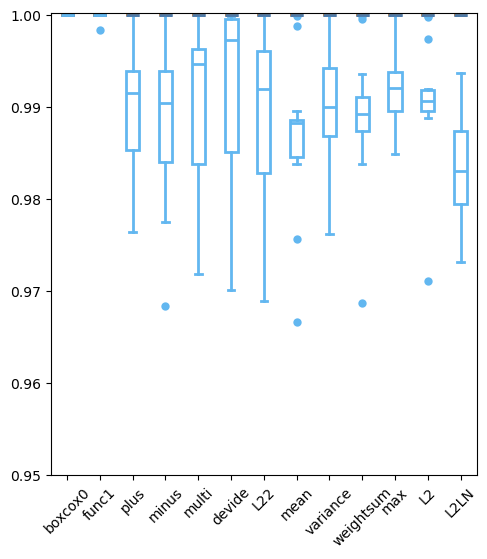

In [4]:
# Create a box plot for each 'hue' level separately
plt.figure(figsize=(5.5, 6))

plt.boxplot(
    patch_artist=True,
    x=[[1.0] for i in func_list],
    positions=np.arange(len(func_list)),
    widths=0.4,
    flierprops=dict(marker='o', markerfacecolor='#F28E2B', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#F28E2B', facecolor='#ffffff', linewidth=1.5),
    medianprops=dict(color='#F28E2B', linewidth=1.5),
    whiskerprops=dict(color='#F28E2B', linewidth=1.5),
    capprops=dict(color='#F28E2B', linewidth=1.5),
)

plt.boxplot(
    patch_artist=True,
    x=[df_ssim[(df_ssim['width'] == 600) & (df_ssim['function'] == i) & (np.isclose(df_ssim['errorbound'],0.0))]['ssim'] for i in func_list],
    positions=np.arange(len(func_list)),
    widths=0.4,
    flierprops=dict(marker='o', markerfacecolor='#4E79A7', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#4E79A7', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#4E79A7', linewidth=2),
    whiskerprops=dict(color='#4E79A7', linewidth=2),
    capprops=dict(color='#4E79A7', linewidth=2),
)

plt.boxplot(
    patch_artist=True,
    x=[df_ssim[(df_ssim['width'] == 600) & (df_ssim['function'] == i) & (np.isclose(df_ssim['errorbound'],0.05))]['ssim'] for i in func_list],
    positions=np.arange(len(func_list)),
    widths=0.4,
    flierprops=dict(marker='o', markerfacecolor='#62B7F0', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#62B7F0', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#62B7F0', linewidth=2),
    whiskerprops=dict(color='#62B7F0', linewidth=2),
    capprops=dict(color='#62B7F0', linewidth=2),
)

plt.xticks(np.arange(len(func_list)), func_list, rotation=45)
plt.ylim(0.95,1.0002)
plt.savefig('boxplot.svg')

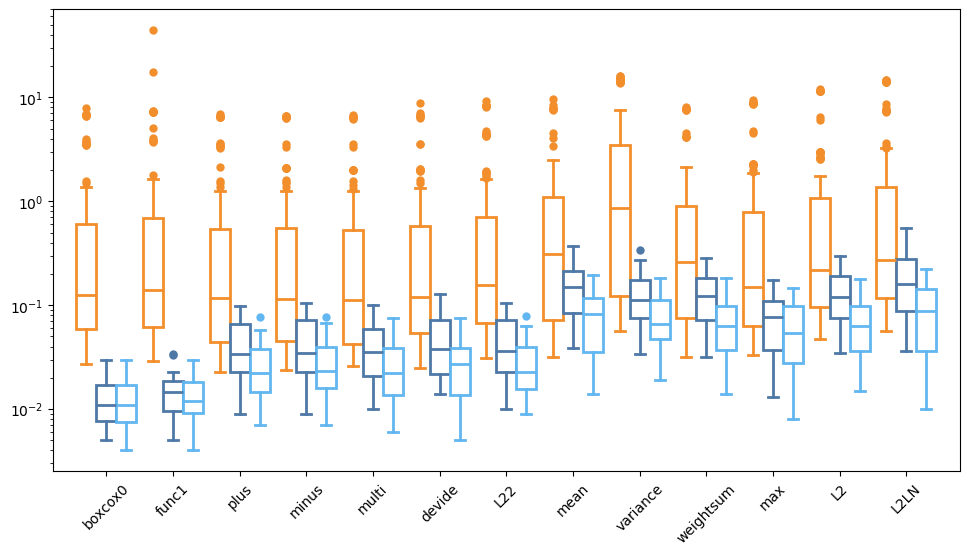

In [5]:
# Create a box plot for each 'hue' level separately
plt.figure(figsize=(11.7, 6))

plt.boxplot(
    patch_artist=True,
    x=[df_dkAM4[(df_dkAM4['function'] == i)]['sqltime'] for i in func_list],
    positions=np.arange(len(func_list))-0.3,
    widths=0.3,
    flierprops=dict(marker='o', markerfacecolor='#F28E2B', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#F28E2B', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#F28E2B', linewidth=2),
    whiskerprops=dict(color='#F28E2B', linewidth=2),
    capprops=dict(color='#F28E2B', linewidth=2),
)

plt.boxplot(
    patch_artist=True,
    x=[df_compressed[(df_compressed['width'] == 600) & (df_compressed['function'] == i) & (np.isclose(df_compressed['errorbound'],0.0))]['time(s)'] for i in func_list],
    positions=np.arange(len(func_list)),
    widths=0.3,
    flierprops=dict(marker='o', markerfacecolor='#4E79A7', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#4E79A7', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#4E79A7', linewidth=2),
    whiskerprops=dict(color='#4E79A7', linewidth=2),
    capprops=dict(color='#4E79A7', linewidth=2),
)

plt.boxplot(
    patch_artist=True,
    x=[df_compressed[(df_compressed['width'] == 600) & (df_compressed['function'] == i) & (np.isclose(df_compressed['errorbound'],0.05))]['time(s)'] for i in func_list],
    positions=np.arange(len(func_list))+0.3,
    widths=0.3,
    flierprops=dict(marker='o', markerfacecolor='#62B7F0', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#62B7F0', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#62B7F0', linewidth=2),
    whiskerprops=dict(color='#62B7F0', linewidth=2),
    capprops=dict(color='#62B7F0', linewidth=2),
)

plt.xticks(np.arange(len(func_list)), func_list, rotation=45)
plt.yscale('log')
plt.savefig('boxplot.svg')

In [6]:
split_func_list = [['boxcox0', 'func1'], ['plus', 'minus', 'multi', 'devide', 'L22'], ['mean', 'variance', 'weightsum', 'max', 'L2', 'L2LN']]
df_pivot = df_compressed[(df_compressed['width'] == 600) & (np.isclose(df_compressed['errorbound'],0.00))].copy()
df_pivot_005 = df_compressed[(df_compressed['width'] == 600) & (np.isclose(df_compressed['errorbound'],0.05))].copy()
df_dkAM4_filtered = df_dkAM4[(df_dkAM4['width'] == 600)].copy()
df_pivot['method'] = 'PIVOT'
df_pivot_005['method'] = 'PIVOT-0.05'
df_dkAM4_filtered['method'] = 'DkAM4'
combined_df = pd.concat([
    df_dkAM4_filtered[['method', 'function', 'memory(GB)']],
    df_pivot[['method', 'function', 'memory(GB)']],
    df_pivot_005[['method', 'function', 'memory(GB)']],
], axis=0)
combined_df['func_type'] = combined_df.apply(lambda r: next(i for i, sublist in enumerate(split_func_list) if r['function'] in sublist), axis=1)

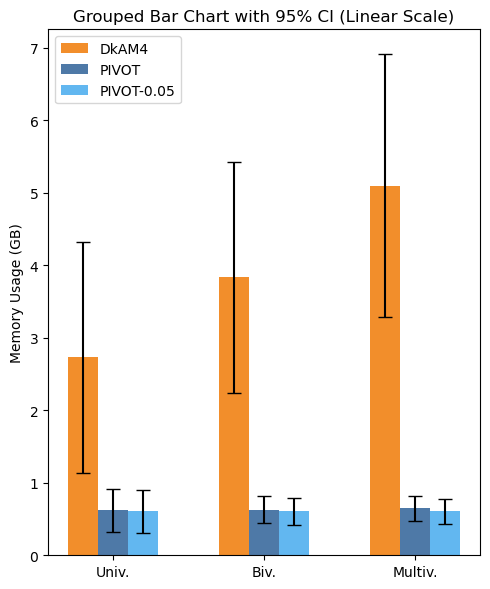

In [7]:
# 计算均值、标准差、样本数和95%置信区间
group_stats = combined_df.groupby(['method', 'func_type'])['memory(GB)'].agg(['mean', 'std', 'count']).reset_index()
group_stats['ci95'] = 1.96 * group_stats['std'] / np.sqrt(group_stats['count'])

# 构建透视表：均值与CI
mean_df = group_stats.pivot(index='func_type', columns='method', values='mean')
ci_df = group_stats.pivot(index='func_type', columns='method', values='ci95')

# 方法顺序（确保一致）
method_order = ['DkAM4', 'PIVOT', 'PIVOT-0.05']
mean_df = mean_df[method_order]
ci_df = ci_df[method_order]

# x轴位置与样式配置
x = np.arange(len(mean_df.index))
bar_width = 0.2
offsets = {
    'DkAM4': -bar_width,
    'PIVOT': 0,
    'PIVOT-0.05': bar_width
}
colors = {
    'DkAM4': '#F28E2B',
    'PIVOT': '#4E79A7',
    'PIVOT-0.05': '#62B7F0'
}

def plot_chart(y_scale='linear', save_path='output.svg', title=''):
    fig, ax = plt.subplots(figsize=(5, 6))
    for method in method_order:
        means = mean_df[method].values
        cis = ci_df[method].values
        ax.bar(x + offsets[method], means, bar_width,
               yerr=cis, capsize=5, label=method, color=colors[method])

    ax.set_xticks(x)
    ax.set_xticklabels(['Univ.', 'Biv.', 'Multiv.'])
    ax.set_ylabel('Memory Usage (GB)')
    ax.set_yscale(y_scale)
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    # plt.close()

# 导出图像
# plot_chart(
#     y_scale='log',
#     save_path='grouped_bar_log_ci.svg',
#     title='Grouped Bar Chart with 95% CI (Log Scale)'
# )
plot_chart(
    y_scale='linear',
    save_path='grouped_bar_linear_ci.svg',
    title='Grouped Bar Chart with 95% CI (Linear Scale)'
)

In [8]:
dataname2size = {
    'synthetic1m': 1051921,
    'synthetic2m': 2103841,
    'synthetic4m': 3944701,
    'synthetic8m': 7889401,
    'synthetic16m': 15778801,
    'synthetic32m': 31557601,
    'synthetic64m': 63115201,
    'synthetic128m': 126230401,
    'synthetic256m': 252460801,
    'synthetic512m5v': 504921601,
    'synthetic1b5v': 1009843202
}
df_pivot_size = df_compressed[(df_compressed['data'].str.startswith('synthetic')) & (df_compressed['function'] == 'L2LN')].copy()
df_pivot_size['size'] = df_pivot_size.apply(lambda x: dataname2size[x['data']], axis=1)
df_pivot_size.sort_values(by='size', inplace=True)
df_dkAM4_size = df_dkAM4[df_dkAM4['data'].str.startswith('synthetic') & (df_dkAM4['function'] == 'L2LN')].copy()
df_dkAM4_size['size'] = df_dkAM4_size.apply(lambda x: dataname2size[x['data']], axis=1)
df_dkAM4_size.sort_values(by='size', inplace=True)

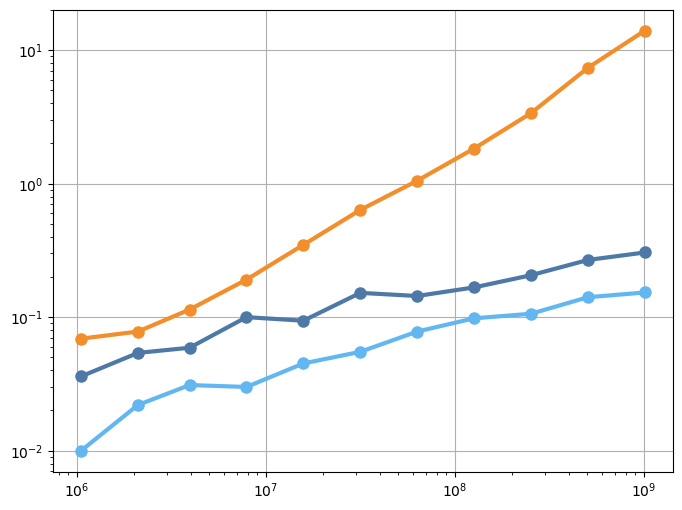

In [9]:
plt.figure(figsize=(8, 6))
filtered_df = df_dkAM4_size[(df_dkAM4_size['width'] == 600)]
plt.plot(filtered_df['size'], filtered_df['sqltime'], color='#F28E2B', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_size[(np.isclose(df_pivot_size['errorbound'],0.0)) & (df_pivot_size['width'] == 600)]
plt.plot(filtered_df['size'], filtered_df['time(s)'], color='#4E79A7', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_size[(np.isclose(df_pivot_size['errorbound'],0.05)) & (df_pivot_size['width'] == 600)]
plt.plot(filtered_df['size'], filtered_df['time(s)'], color='#62B7F0', marker='o', linewidth=3, ms=8)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig('linechart.svg')

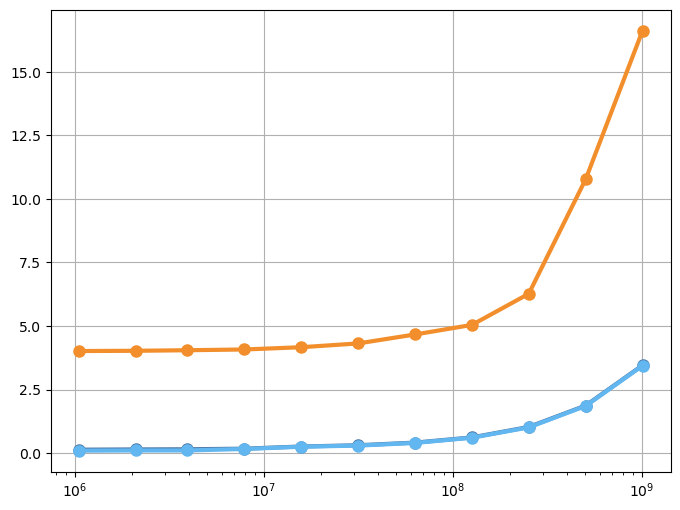

In [10]:
plt.figure(figsize=(8, 6))
filtered_df = df_dkAM4_size[(df_dkAM4_size['width'] == 600)]
plt.plot(filtered_df['size'], filtered_df['memory(GB)'], color='#F28E2B', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_size[(np.isclose(df_pivot_size['errorbound'],0.0)) & (df_pivot_size['width'] == 600)]
plt.plot(filtered_df['size'], filtered_df['memory(GB)'], color='#4E79A7', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_size[(np.isclose(df_pivot_size['errorbound'],0.05)) & (df_pivot_size['width'] == 600)]
plt.plot(filtered_df['size'], filtered_df['memory(GB)'], color='#62B7F0', marker='o', linewidth=3, ms=8)
plt.xscale('log')
plt.grid()
plt.savefig('linechart.svg')

In [11]:
df_dkAM4_var_num = pd.read_csv('experiment_data/duck_num_variables.csv')
df_dkAM4_var_num['memory(GB)'] = df_dkAM4_var_num['memery(kb)']/1024/1024
df_pivot_var_num = pd.read_csv('experiment_data/cpp_num_variables.csv')
df_pivot_var_num['memory(GB)'] = df_pivot_var_num['memery(kb)']/1024/1024

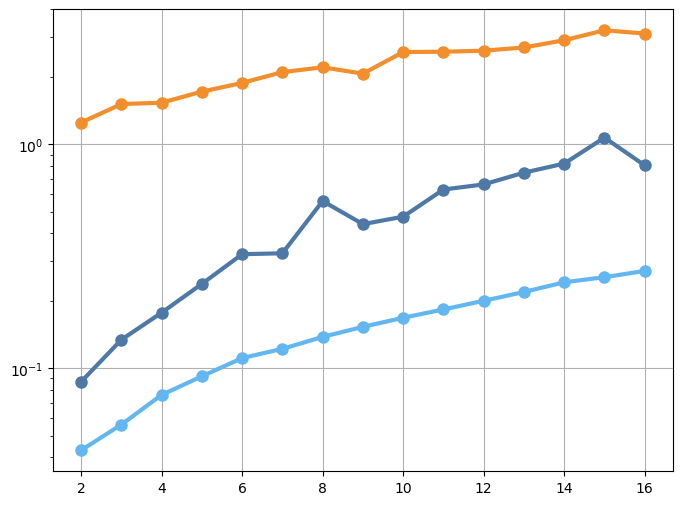

In [12]:
plt.figure(figsize=(8, 6))
filtered_df = df_dkAM4_var_num[df_dkAM4_var_num['variable'] != 1]
plt.plot(filtered_df['variable'], filtered_df['time(s)'], color='#F28E2B', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_var_num[(df_pivot_var_num['variable'] != 1) & (np.isclose(df_pivot_var_num['errorbound'],0.0))]
plt.plot(filtered_df['variable'], filtered_df['time(s)'], color='#4E79A7', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_var_num[(df_pivot_var_num['variable'] != 1) & (np.isclose(df_pivot_var_num['errorbound'],0.05))]
plt.plot(filtered_df['variable'], filtered_df['time(s)'], color='#62B7F0', marker='o', linewidth=3, ms=8)
plt.yscale('log')
plt.grid()
plt.savefig('linechart.svg')

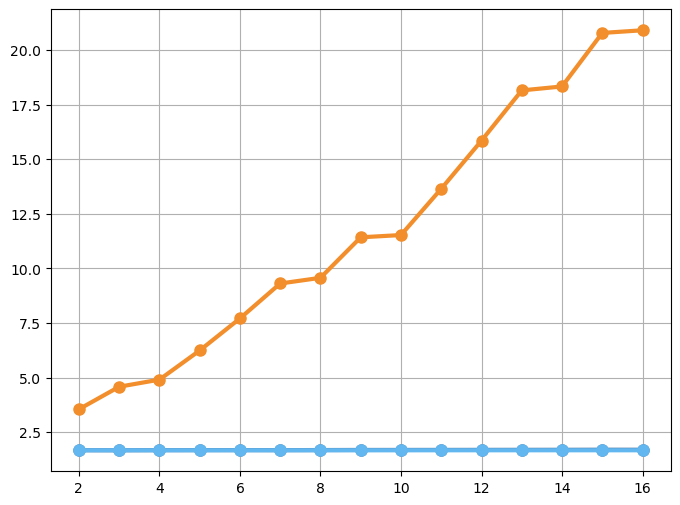

In [13]:
plt.figure(figsize=(8, 6))
filtered_df = df_dkAM4_var_num[df_dkAM4_var_num['variable'] != 1]
plt.plot(filtered_df['variable'], filtered_df['memory(GB)'], color='#F28E2B', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_var_num[(df_pivot_var_num['variable'] != 1) & (np.isclose(df_pivot_var_num['errorbound'],0.0))]
plt.plot(filtered_df['variable'], filtered_df['memory(GB)'], color='#4E79A7', marker='o', linewidth=3, ms=8)
filtered_df = df_pivot_var_num[(df_pivot_var_num['variable'] != 1) & (np.isclose(df_pivot_var_num['errorbound'],0.05))]
plt.plot(filtered_df['variable'], filtered_df['memory(GB)'], color='#62B7F0', marker='o', linewidth=3, ms=8)
plt.grid()
plt.savefig('linechart.svg')

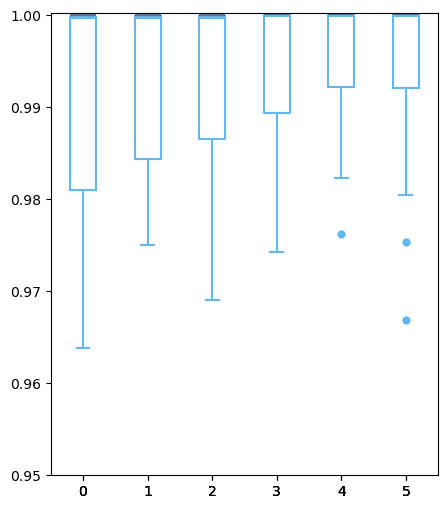

In [14]:
# Create a box plot for each 'hue' level separately
plt.figure(figsize=(5, 6))

plt.boxplot(
    patch_artist=True,
    x=[[1.0] for i in range(1,7)],
    positions=np.arange(6),
    widths=0.4,
    flierprops=dict(marker='o', markerfacecolor='#F28E2B', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#F28E2B', facecolor='#ffffff', linewidth=1.5),
    medianprops=dict(color='#F28E2B', linewidth=1.5),
    whiskerprops=dict(color='#F28E2B', linewidth=1.5),
    capprops=dict(color='#F28E2B', linewidth=1.5),
)

plt.boxplot(
    patch_artist=True,
    x=[df_ssim[(df_ssim['width']==200*i) & (np.isclose(df_ssim['errorbound'],0.0)) & (df_ssim['data'] == 'sensordata')]['ssim'] for i in range(1,7)],
    positions=np.arange(6),
    widths=0.4,
    flierprops=dict(marker='o', markerfacecolor='#4E79A7', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#4E79A7', facecolor='#ffffff', linewidth=1.5),
    medianprops=dict(color='#4E79A7', linewidth=1.5),
    whiskerprops=dict(color='#4E79A7', linewidth=1.5),
    capprops=dict(color='#4E79A7', linewidth=1.5),
)

plt.boxplot(
    patch_artist=True,
    x=[df_ssim[(df_ssim['width']==200*i) & (np.isclose(df_ssim['errorbound'],0.05)) & (df_ssim['data'] == 'sensordata')]['ssim'] for i in range(1,7)],
    positions=np.arange(6),
    widths=0.4,
    flierprops=dict(marker='o', markerfacecolor='#62B7F0', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#62B7F0', facecolor='#ffffff', linewidth=1.5),
    medianprops=dict(color='#62B7F0', linewidth=1.5),
    whiskerprops=dict(color='#62B7F0', linewidth=1.5),
    capprops=dict(color='#62B7F0', linewidth=1.5),
)

plt.ylim(0.95,1.0002)
plt.savefig('boxplot.svg')

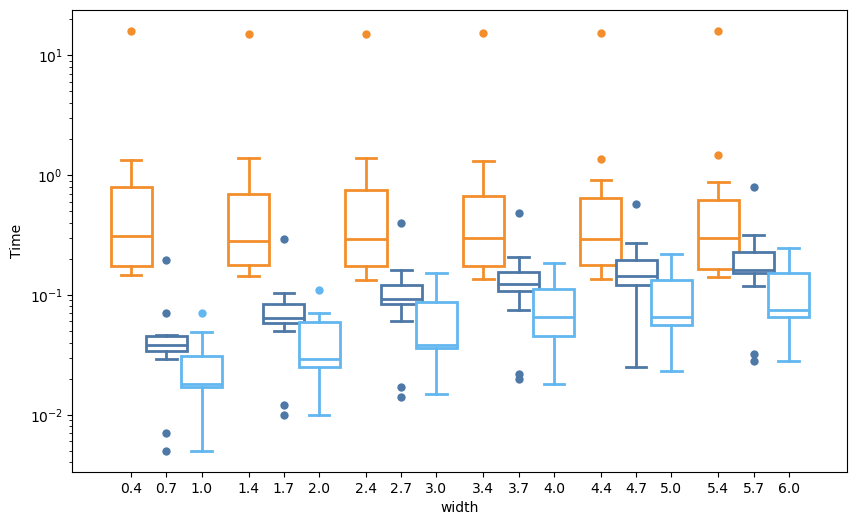

In [15]:
# Create a box plot for each 'hue' level separately
plt.figure(figsize=(10, 6))

plt.boxplot(
    patch_artist=True,
    x=[df_dkAM4[(df_dkAM4['width']==200*i) & (df_dkAM4['data'] == 'sensordata')]['sqltime'] for i in range(1,7)],
    positions=np.arange(6)+0.4,
    widths=0.35,
    flierprops=dict(marker='o', markerfacecolor='#F28E2B', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#F28E2B', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#F28E2B', linewidth=2),
    whiskerprops=dict(color='#F28E2B', linewidth=2),
    capprops=dict(color='#F28E2B', linewidth=2),
)


plt.boxplot(
    patch_artist=True,
    x=[df_compressed[(df_compressed['width']==200*i) & (np.isclose(df_compressed['errorbound'],0.0)) & (df_compressed['data'] == 'sensordata')]['time(s)'] for i in range(1,7)],
    positions=np.arange(6)+0.7,
    widths=0.35,
    flierprops=dict(marker='o', markerfacecolor='#4E79A7', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#4E79A7', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#4E79A7', linewidth=2),
    whiskerprops=dict(color='#4E79A7', linewidth=2),
    capprops=dict(color='#4E79A7', linewidth=2),
)

plt.boxplot(
    patch_artist=True,
    x=[df_compressed[(df_compressed['width']==200*i) & (np.isclose(df_compressed['errorbound'],0.05)) & (df_compressed['data'] == 'sensordata')]['time(s)'] for i in range(1,7)],
    positions=np.arange(6)+1.0,
    widths=0.35,
    flierprops=dict(marker='o', markerfacecolor='#62B7F0', markeredgecolor='none', markersize=6),
    boxprops=dict(color='#62B7F0', facecolor='#ffffff', linewidth=2),
    medianprops=dict(color='#62B7F0', linewidth=2),
    whiskerprops=dict(color='#62B7F0', linewidth=2),
    capprops=dict(color='#62B7F0', linewidth=2),
)


# Set plot labels and scale
plt.xlabel("width")
plt.ylabel("Time")
plt.yscale('log')
# plt.ylim(0,3)
plt.savefig('boxplot.svg')

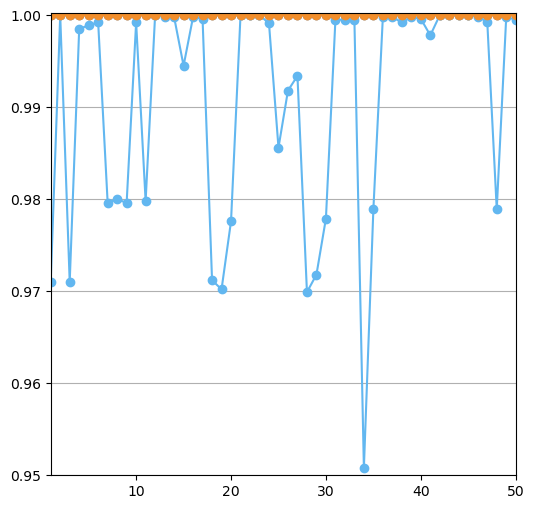

In [16]:
plt.figure(figsize=(6, 6))

df_ours_interactive = pd.read_csv('experiment_data/interactive_nyc_0.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['ssim'], 'o-', color='#4E79A7', label='ours-cpp-16')
df_ours_interactive = pd.read_csv('experiment_data/interactive_nyc_005.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['ssim'], 'o-', color='#62B7F0', label='ours-cpp-16')

plt.plot(range(1,filtered_df.shape[0]+1), [1.0]*filtered_df.shape[0], 'o-', color='#F28E2B', label='ours-cpp-16')
plt.xlim(1, 50)
plt.ylim(0.95, 1.0002)
plt.grid(True, which='both', axis='y')
plt.savefig('interactive_scenario.svg')

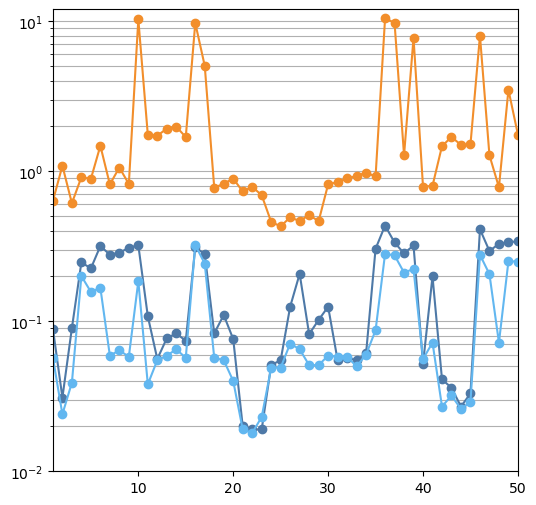

In [17]:
plt.figure(figsize=(6, 6))
df_ours_interactive = pd.read_csv('experiment_data/interactive_nyc_0.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['sqltime'], 'o-', color='#4E79A7', label='ours-cpp-16')
df_ours_interactive = pd.read_csv('experiment_data/interactive_nyc_005.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['sqltime'], 'o-', color='#62B7F0', label='ours-cpp-16')
df_duck_interactive = pd.read_csv('experiment_data/duck-interaction.csv')
filtered_df = df_duck_interactive[(df_duck_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['sqltime'], 'o-', color='#F28E2B', label='ours-cpp-16')

plt.yscale('log')
plt.xlim(1, 50)
plt.ylim(10**-2, 12)
plt.grid(True, which='both', axis='y')
# plt.legend()
plt.savefig('interactive_scenario.svg')

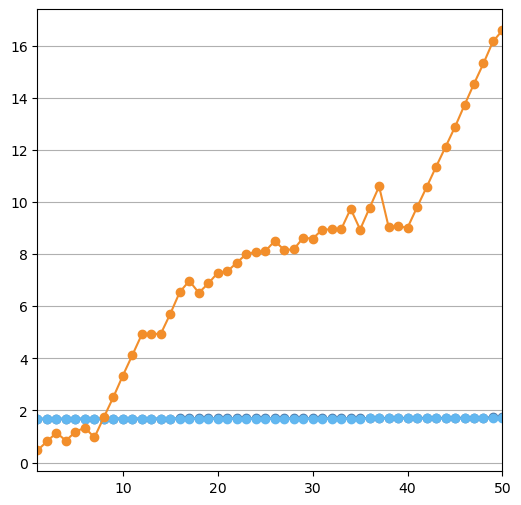

In [18]:
plt.figure(figsize=(6, 6))
df_ours_interactive = pd.read_csv('experiment_data/interactive_nyc_0.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['memeoryuse']/1024/1024, 'o-', color='#4E79A7', label='ours-cpp-16')
df_ours_interactive = pd.read_csv('experiment_data/interactive_nyc_005.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['memeoryuse']/1024/1024, 'o-', color='#62B7F0', label='ours-cpp-16')
df_duck_interactive = pd.read_csv('experiment_data/duck-interaction.csv')
filtered_df = df_duck_interactive[(df_duck_interactive['data'] == 'nycsecond')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['memeoryuse']/1024/1024, 'o-', color='#F28E2B', label='ours-cpp-16')

# plt.yscale('log')
plt.xlim(1, 50)
# plt.ylim(10**-2, 12)
plt.grid(True, which='both', axis='y')
# plt.legend()
plt.savefig('interactive_scenario.svg')

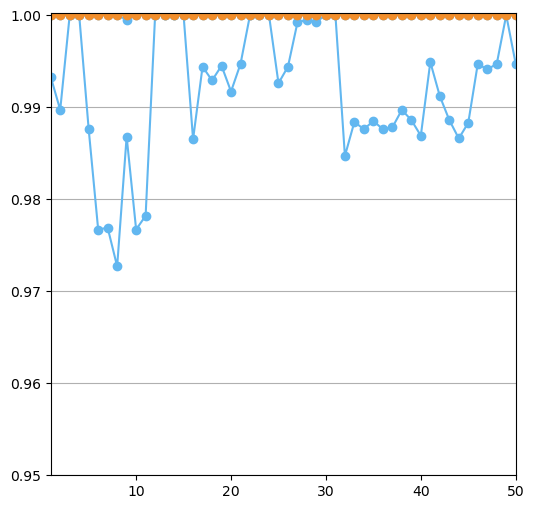

In [19]:
plt.figure(figsize=(6, 6))

df_ours_interactive = pd.read_csv('experiment_data/interaction-1b5v.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['errorBound']==0.05) & (df_ours_interactive['data'] == 'synthetic1b5v')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['ssim'], 'o-', color='#62B7F0', label='ours-cpp-16')
filtered_df = df_ours_interactive[(df_ours_interactive['errorBound']==0.00) & (df_ours_interactive['data'] == 'synthetic1b5v')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['ssim'], 'o-', color='#62B7F0', label='ours-cpp-16')

plt.plot(range(1,filtered_df.shape[0]+1), [1.0]*filtered_df.shape[0], 'o-', color='#F28E2B', label='ours-cpp-16')
plt.xlim(1, 50)
plt.ylim(0.95, 1.0002)
plt.grid(True, which='both', axis='y')
plt.savefig('interactive_scenario.svg')

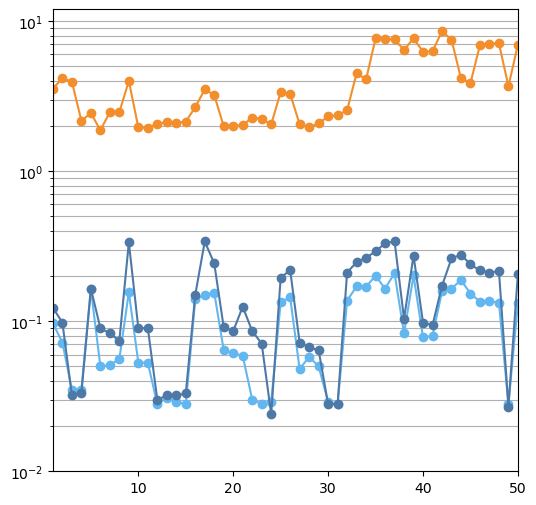

In [20]:
plt.figure(figsize=(6, 6))
df_ours_interactive = pd.read_csv('experiment_data/interaction-1b5v.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['errorBound']==0.05) & (df_ours_interactive['data'] == 'synthetic1b5v')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['sqltime'], 'o-', color='#62B7F0', label='ours-cpp-16')
filtered_df = df_ours_interactive[(df_ours_interactive['errorBound']==0.00) & (df_ours_interactive['data'] == 'synthetic1b5v')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['sqltime'], 'o-', color='#4E79A7', label='ours-cpp-16')

df_duck_interactive = pd.read_csv('experiment_data/duck-interaction.csv')
filtered_df = df_duck_interactive[(df_duck_interactive['data'] == 'synthetic1b5v')].head(50)

plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['sqltime'], 'o-', color='#F28E2B', label='ours-cpp-16')

plt.yscale('log')

plt.xlim(1, 50)
plt.ylim(10**-2, 12)
plt.grid(True, which='both', axis='y')
plt.savefig('interactive_scenario.svg')

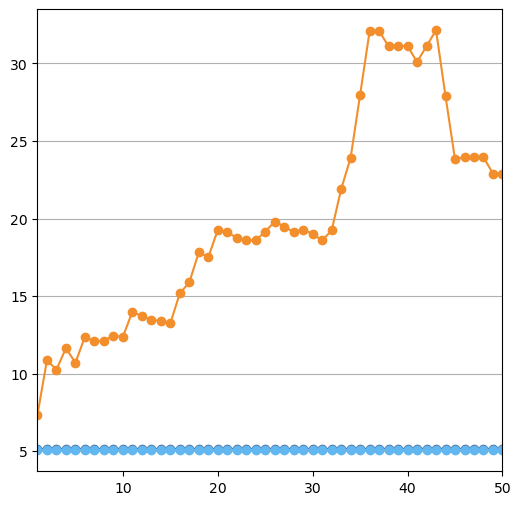

In [21]:
plt.figure(figsize=(6, 6))
df_ours_interactive = pd.read_csv('experiment_data/interaction-1b5v.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'synthetic1b5v') & (df_ours_interactive['errorBound']==0.00)].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['memeoryuse']/1024/1024, 'o-', color='#4E79A7', label='ours-cpp-16')
df_ours_interactive = pd.read_csv('experiment_data/interaction-1b5v.csv')
filtered_df = df_ours_interactive[(df_ours_interactive['data'] == 'synthetic1b5v') & (df_ours_interactive['errorBound']==0.05)].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['memeoryuse']/1024/1024, 'o-', color='#62B7F0', label='ours-cpp-16')
df_duck_interactive = pd.read_csv('experiment_data/duck-interaction.csv')
filtered_df = df_duck_interactive[(df_duck_interactive['data'] == 'synthetic1b5v')].head(50)
plt.plot(range(1,filtered_df.shape[0]+1), filtered_df['memeoryuse']/1024/1024, 'o-', color='#F28E2B', label='ours-cpp-16')

plt.xlim(1, 50)
plt.grid(True, which='both', axis='y')
plt.savefig('interactive_scenario.svg')